In [7]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
dataset = pd.read_csv("breast-cancer.csv")
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [26]:
dataset.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Data Corelation and Covariance

In [27]:
dataset.cov()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.563015e+16,-2.405983e+06,3.287883e+07,5.364807e+07,2.222490e+08,4.262946e+09,-22802.053383,631.883924,499127.721282,214217.739286,...,4.973106e+07,3.360214e+08,7.629681e+09,29510.163781,-58383.413342,605181.617857,289052.809853,-342061.639212,-67437.508622,NaN
diagnosis,-2.405983e+06,2.341766e-01,-1.244954e+00,-8.641453e-01,-8.732438e+00,-1.207382e+02,-0.002440,-0.015246,-0.026864,-0.014583,...,-1.358959e+00,-1.273087e+01,-2.021850e+02,-0.004657,-0.044997,-0.066592,-0.025243,-0.012463,-0.002831,NaN
radius_mean,3.287883e+07,-1.244954e+00,1.241892e+01,4.907582e+00,8.544714e+01,1.224483e+03,0.008454,0.094197,0.190128,0.112475,...,6.433100e+00,1.142886e+02,1.888227e+03,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450,NaN
texture_mean,5.364807e+07,-8.641453e-01,4.907582e+00,1.849891e+01,3.443976e+01,4.859938e+02,-0.001415,0.053767,0.103692,0.048977,...,2.411015e+01,5.174593e+01,8.412838e+02,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260,NaN
perimeter_mean,2.222490e+08,-8.732438e+00,8.544714e+01,3.443976e+01,5.904405e+02,8.435772e+03,0.070836,0.714714,1.387234,0.802360,...,4.525811e+01,7.923282e+02,1.302615e+04,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391,NaN
area_mean,4.262946e+09,-1.207382e+02,1.224483e+03,4.859938e+02,8.435772e+03,1.238436e+05,0.876178,9.264931,19.244924,11.241958,...,6.218249e+02,1.134179e+04,1.921926e+05,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756,NaN
smoothness_mean,-2.280205e+04,-2.440318e-03,8.454460e-03,-1.414779e-03,7.083607e-02,8.761781e-01,0.000198,0.000490,0.000585,0.000302,...,3.118110e-03,1.128795e-01,1.655299e+00,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127,NaN
compactness_mean,6.318839e+02,-1.524564e-02,9.419706e-02,5.376681e-02,7.147141e-01,9.264931e+00,0.000490,0.002789,0.003718,0.001703,...,8.054412e-02,1.047413e+00,1.532344e+01,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656,NaN
concavity_mean,4.991277e+05,-2.686406e-02,1.901276e-01,1.036923e-01,1.387234e+00,1.924492e+01,0.000585,0.003718,0.006355,0.002850,...,1.469342e-01,1.954350e+00,3.068241e+01,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741,NaN
concave points_mean,2.142177e+05,-1.458278e-02,1.124751e-01,4.897693e-02,8.023604e-01,1.124196e+01,0.000302,0.001703,0.002850,0.001506,...,6.981902e-02,1.116016e+00,1.788688e+01,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258,NaN


In [33]:
dataset.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,-0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,-0.039769,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872,NaN
radius_mean,0.074626,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


In [36]:
dataset["diagnosis"].unique()

array([0, 1])

# Visualisasi Data

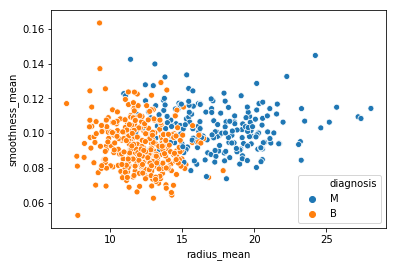

In [39]:
sns.scatterplot(x = dataset["radius_mean"], y = dataset["smoothness_mean"], hue = "diagnosis", data = dataset)

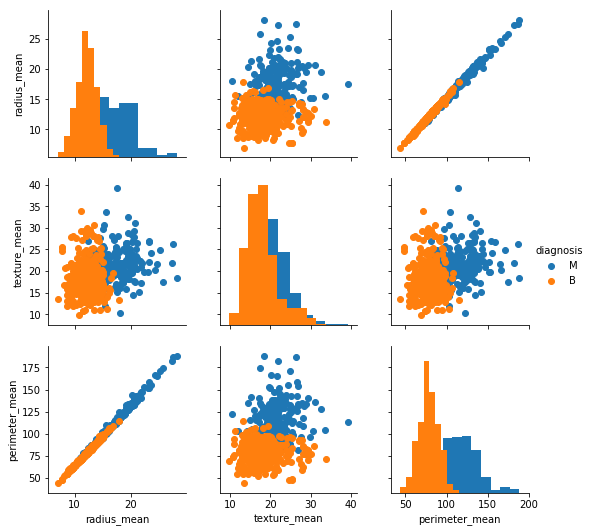

In [13]:
iris = dataset[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean"]]
g = sns.PairGrid(iris, hue="diagnosis")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

# Clasification

In [41]:
y = dataset["diagnosis"]
# y.replace(("M", "B"),(0,1), inplace=True)
x = dataset.drop("diagnosis", axis =1)
x = x.drop("id", axis=1)
x = x.drop("Unnamed: 32", axis=1)
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.10, random_state=42)


In [16]:
# count score of testing process
def showScoreResult(a, b):
    print("Mean absolute error: %.2f" % np.mean(np.absolute(a - b)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((a - b) ** 2))
    print("R2-score: %.2f" % r2_score(a , b))

# func to show regression plot 
def showRegPlot(data_feature, label):
    label = np.array(label,"int")
    data = np.array(data_feature,"int")
    dataframe = pd.DataFrame(columns=('x', 'y', 'diagnosis'))
    for i in range(len(data[:,0])-1):
        dataframe.set_value(len(dataframe), ['x','y','diagnosis'], [data[:,1][i],data[:,3][i],label[i]])
    sns.regplot(x="x", y="y", data=dataframe)
    sns.scatterplot(x="x", y="y",hue="diagnosis",data=dataframe)
    

In [56]:
# knn
from sklearn.neighbors import KNeighborsClassifier #library KNN
# make teh knn object with k = 1
clf = KNeighborsClassifier(n_neighbors=1) 
# fit the training data
clf.fit(train_x, train_y)
# show score or acuration from training or learning process
print("Score :  ", clf.score(train_x, train_y) * 100, "%")#training score

Score :   100.0 %


In [57]:
# test_x


In [58]:
# try predict the testing data
predict = clf.predict(test_x)
true_label = np.array(test_y)
print("Test Score :", clf.score(test_x, test_y)*100, "%")

Test Score : 98.24561403508771 %


In [59]:
test_y

204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
457    1
167    0
165    1
329    0
527    1
83     0
511    1
556    1
101    1
535    0
73     0
394    1
393    0
425    1
305    1
76     1
384    1
555    1
362    1
72     0
551    1
158    1
424    1
532    1
222    1
55     1
10     0
281    1
6      0
90     1
104    1
353    0
422    1
211    1
275    1
109    1
520    1
557    1
531    1
284    1
264    0
30     0
208    1
528    1
145    1
464    1
320    1
Name: diagnosis, dtype: int64

/home/aria/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


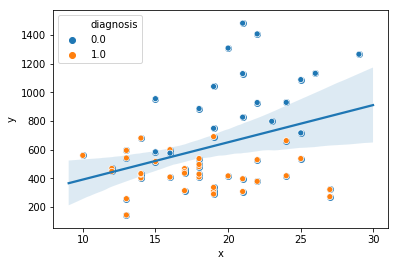

In [60]:
showRegPlot(test_x, predict)

/home/aria/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


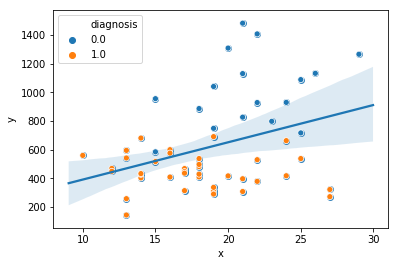

In [61]:
showRegPlot(test_x, test_y)

In [62]:
showScoreResult(true_label, predict)

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.02
R2-score: 0.92


In [63]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))

Text(0, 0.5, 'Mean Error')

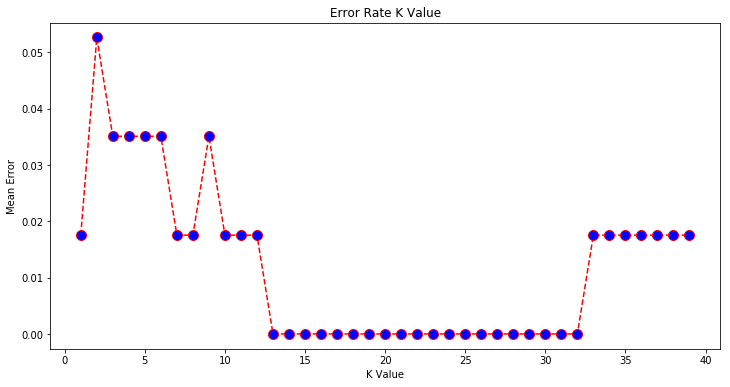

In [64]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

# Regresion

In [67]:
from sklearn import linear_model
regr = linear_model.LogisticRegression()
regr.fit (train_x, train_y)
regr.score(train_x,train_y)

/home/aria/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.955078125

In [68]:
regresion_predict = regr.predict(test_x)
showScoreResult(np.array(regresion_predict), test_y)

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.02
R2-score: 0.91


/home/aria/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


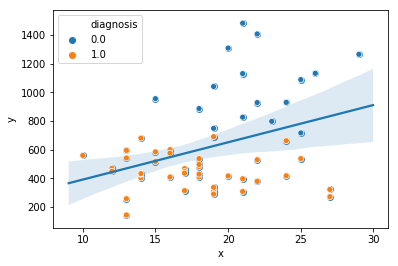

In [69]:
showRegPlot(test_x, regresion_predict)

/home/aria/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


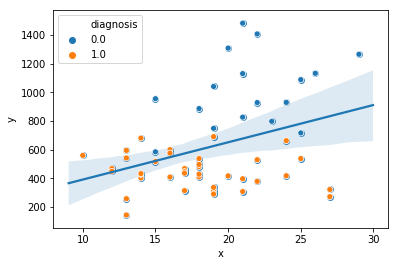

In [32]:
showRegPlot(test_x, test_y)

# Clustering

In [70]:
from sklearn.cluster import KMeans
X = dataset[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se']]
kmn = KMeans(n_clusters=2)
clus = kmn.fit(X)
y = clus.labels_
kmn.score(X, y)
len(y)

569

In [71]:
from sklearn.metrics import silhouette_score
silscore = silhouette_score(X,y)
print(silscore)

0.6991291254565809


In [76]:
%matplotlib inline
dataset["texture_mean"]

0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
5      15.70
6      19.98
7      20.83
8      21.82
9      24.04
10     23.24
11     17.89
12     24.80
13     23.95
14     22.61
15     27.54
16     20.13
17     20.68
18     22.15
19     14.36
20     15.71
21     12.44
22     14.26
23     23.04
24     21.38
25     16.40
26     21.53
27     20.25
28     25.27
29     15.05
       ...  
539    25.44
540    14.44
541    24.99
542    25.42
543    28.06
544    20.70
545    23.23
546    16.35
547    16.58
548    19.34
549    24.21
550    21.48
551    22.44
552    29.43
553    21.94
554    28.92
555    27.61
556    19.59
557    27.88
558    22.68
559    23.93
560    27.15
561    29.37
562    30.62
563    25.09
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: texture_mean, Length: 569, dtype: float64

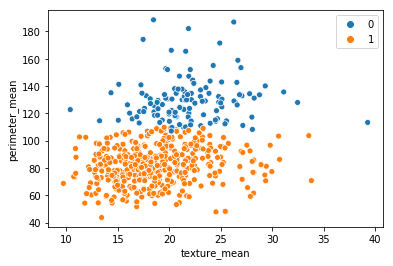

In [130]:
ax = sns.scatterplot(x=X["texture_mean"],y=X["perimeter_mean"], hue=y )

In [72]:
from sklearn.mixture import GaussianMixture
gauss = GaussianMixture(n_components=2)
gauss.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [73]:
label2 = gauss.fit_predict(X)
silscore2 = silhouette_score(X,label2)
print(silscore2)

0.6194206337361003


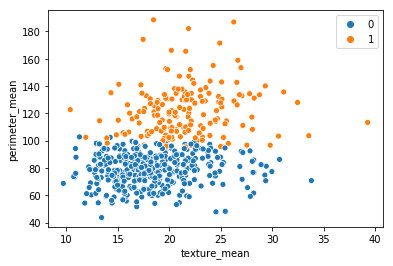

In [136]:
ax = sns.scatterplot(x=X["texture_mean"],y=X["perimeter_mean"], hue=label2 )

# ARM

In [82]:
def discretization(attr):
    inp = list(dataset[attr].to_numpy())
    midi = dataset[attr].describe()
    out = []
    for x in inp:
        if(x<=float(midi.loc['25%'])):
            out.append("Small")
        elif(x>float(midi.loc['25%']) and x<=float(midi.loc['50%'])):
            out.append("Medium")
        elif(x>float(midi.loc['50%']) and x<=float(midi.loc['75%'])):
            out.append("Large")
#         if(x<=float(midi.loc['25%'])):
#             out.append("Large")    
        else:
            out.append("X Large")
    return out

def multiDiscretization(attrs):
    for x in attrs:
        dataset[x+'_disc'] = pd.Series(discretization(x),index=dataset.index)

In [81]:
dataset["perimeter_mean"].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

In [84]:
multiDiscretization(['perimeter_mean'])

In [85]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,perimeter_mean_disc
0,842302,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN,X Large
1,842517,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN,X Large
2,84300903,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN,X Large
3,84348301,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN,Medium
4,84358402,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN,X Large
5,843786,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN,Medium
6,844359,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN,X Large
7,84458202,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN,Large
8,844981,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN,Large
9,84501001,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN,Medium


In [86]:
from sqlalchemy import create_engine
from pandas.io import sql
engine = create_engine('sqlite:///:memory:')
dataset.to_sql('b_cancer',engine)
# dataset

In [87]:
def ARMformat(a,b,tb):
    collect = []
    for x in dataset[a].unique():
        q = "SELECT "+b+" FROM "+tb+" WHERE "+a+"='"+str(x)+"'"
        res = pd.read_sql_query(q,engine)
        res=res[b].unique()
        resclean = []
        for i in res:
            if i!=None:
                resclean.append(i)
        resmin = resclean[0:10] #terpaksa biar cepat saja
        collect.append(list(resmin))
    return collect

In [88]:
data = ARMformat('diagnosis','perimeter_mean_disc','b_cancer')
len(data)

2

In [90]:
i = 0
pre = dataset['diagnosis'].unique()
for dt in data:
    print(pre[i],dt,"\n")
    i+=1

0 ['X Large', 'Medium', 'Large', 'Small'] 

1 ['Large', 'Medium', 'Small', 'X Large'] 



In [91]:
import pyfpgrowth
patterns = pyfpgrowth.find_frequent_patterns(data, 1)
for p,d in patterns.items():
    print(p,":",d)

('X Large',) : 2
('Small', 'X Large') : 2
('Medium', 'X Large') : 2
('Large', 'X Large') : 2
('Medium', 'Small', 'X Large') : 2
('Large', 'Small', 'X Large') : 2
('Large', 'Medium', 'X Large') : 2
('Large', 'Medium', 'Small', 'X Large') : 2
('Large', 'Medium') : 2
('Large',) : 2
('Large', 'Small') : 2
('Large', 'Medium', 'Small') : 2
('Medium', 'Small') : 2


In [119]:
rules = pyfpgrowth.generate_association_rules(patterns, 1.0)
for p,d in rules.items():
    print(p,"=>",d)

('Very Large',) => (('Large', 'Medium', 'Small'), 1.0)
('Large',) => (('Medium',), 1.0)
('Medium', 'Small') => (('Large',), 1.0)
('Medium', 'Very Large') => (('Large', 'Small'), 1.0)
('Small', 'Very Large') => (('Large', 'Medium'), 1.0)
('Large', 'Small') => (('Medium',), 1.0)
('Large', 'Very Large') => (('Medium', 'Small'), 1.0)
('Large', 'Medium') => (('Small',), 1.0)
('Large', 'Medium', 'Small') => (('Very Large',), 1.0)
('Large', 'Medium', 'Very Large') => (('Small',), 1.0)
('Large', 'Small', 'Very Large') => (('Medium',), 1.0)
('Medium', 'Small', 'Very Large') => (('Large',), 1.0)


In [120]:
from efficient_apriori import apriori
itemsets, rules = apriori(data, min_support=0.2,  min_confidence=0.2)
hasil = []
for x in rules:
    hasil.append([str(x.lhs)+"=>"+str(x.rhs),x.support,x.confidence,x.lift,x.conviction])
    print(str(x.lhs)+"=>"+str(x.rhs),x.support,x.confidence,x.lift,x.conviction,sep="\t")

('Medium',)=>('Large',)	1.0	1.0	1.0	0.0
('Large',)=>('Medium',)	1.0	1.0	1.0	0.0
('Small',)=>('Large',)	1.0	1.0	1.0	0.0
('Large',)=>('Small',)	1.0	1.0	1.0	0.0
('Very Large',)=>('Large',)	1.0	1.0	1.0	0.0
('Large',)=>('Very Large',)	1.0	1.0	1.0	0.0
('Small',)=>('Medium',)	1.0	1.0	1.0	0.0
('Medium',)=>('Small',)	1.0	1.0	1.0	0.0
('Very Large',)=>('Medium',)	1.0	1.0	1.0	0.0
('Medium',)=>('Very Large',)	1.0	1.0	1.0	0.0
('Very Large',)=>('Small',)	1.0	1.0	1.0	0.0
('Small',)=>('Very Large',)	1.0	1.0	1.0	0.0
('Medium', 'Small')=>('Large',)	1.0	1.0	1.0	0.0
('Large', 'Small')=>('Medium',)	1.0	1.0	1.0	0.0
('Large', 'Medium')=>('Small',)	1.0	1.0	1.0	0.0
('Small',)=>('Large', 'Medium')	1.0	1.0	1.0	0.0
('Medium',)=>('Large', 'Small')	1.0	1.0	1.0	0.0
('Large',)=>('Medium', 'Small')	1.0	1.0	1.0	0.0
('Medium', 'Very Large')=>('Large',)	1.0	1.0	1.0	0.0
('Large', 'Very Large')=>('Medium',)	1.0	1.0	1.0	0.0
('Large', 'Medium')=>('Very Large',)	1.0	1.0	1.0	0.0
('Very Large',)=>('Large', 'Medium')	1.0	1.0	1.0	